# Extracting Sentiments for Trump's Tweets

In [2]:
# The usual suspects ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time_series as ts

# And their accomplices ...
from textblob import TextBlob
from gensim import corpora
from gensim import models
from gensim import similarities
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from collections import defaultdict

In [3]:
tweets = pd.read_csv('data/realDonaldTrump_poll_tweets.csv')

In [16]:
# Sanitize the text
#def sanitize_text():
# 1. Create a text corpus
document = [i for i in tweets['text']]
# 2. Remove common words
stop_words = set(stopwords.words('english'))
for doc in document:
    list_of_words = [i.lower() for i in wordpunct_tokenize(doc) if i.lower() not in stop_words]
stop_words.update(list_of_words)
texts = [[word for word in line.lower().split() if word not in stop_words] for line in text_corpus]
# 3. Remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1] for text in texts]
#    return texts
#sanitize_text()

In [31]:
tweets['text'][0]

"It's just a 2-point race, Clinton 38%, Trump 36%' https://t.co/EzDzJ4EzIN"

In [32]:
'%' in tweets['text'][0]

True

In [29]:
list_of_words

['rt',
 '@',
 'foxnews',
 ':',
 '.@',
 'ericbolling',
 ':',
 '"',
 'polls',
 'show',
 '[@',
 'realdonaldtrump',
 'would',
 ']',
 'gop',
 'nominee',
 'vote',
 'held',
 'today',
 '."',
 'http',
 '://',
 '.',
 'co',
 '/',
 'exmntvrtwd']

In [34]:
for i in list_of_words:
    for j in range(len(tweets['text'])):
        if i in tweets['text'][j]:
            tweets['text'].

:
:
http
://
.
co
/


In [ ]:
tweets['t']

In [3]:
polarity, subjectivity = list(), list()
for tweet in tweets['text']:
    blob = TextBlob(tweet)
    polarity.append(blob.polarity)
    subjectivity.append(blob.subjectivity)
tweets['polarity'] = polarity
tweets['subjectivity'] = subjectivity
tweets.head()

,id,created_at,text,polarity,subjectivity
0,7.656299e+17,8/16/2016 19:22:57,"It's just a 2-point race, Clinton 38%, Trump 3...",0.000000,0.000000
1,7.587319e+17,7/28/2016 18:32:31,"""@LallyRay: Poll: Donald Trump Sees 17-Point P...",0.613636,0.647727
2,7.583505e+17,7/27/2016 17:16:56,Great new poll - thank you!\n#MakeAmericaGreat...,0.485227,0.602273
3,7.575775e+17,7/25/2016 14:05:27,Great POLL numbers are coming out all over. Pe...,0.133333,0.483333
4,7.536034e+17,7/14/2016 14:53:46,Another new poll. Thank you for your support! ...,0.213068,0.454545


(None, None)

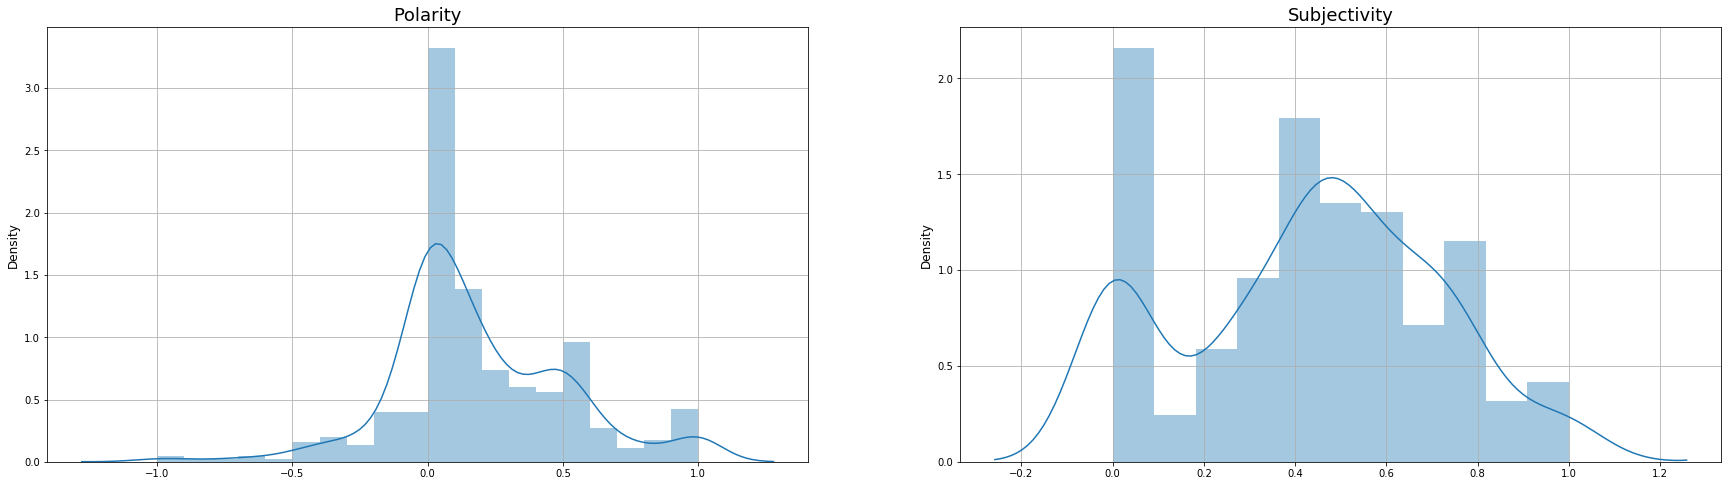

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))
sns.distplot(tweets['polarity'], label='Polarity', ax=ax1)
sns.distplot(tweets['subjectivity'], label='Subjectivity', ax=ax2)
ax1.set_title('Polarity', fontsize=18), ax2.set_title('Subjectivity', fontsize=18)
ax1.set_ylabel('Density', fontsize=12), ax2.set_ylabel('Density', fontsize=12)
ax1.set_xlabel(''), ax2.set_xlabel('')
ax1.grid(), ax2.grid()

In [5]:
ts.convert_to_datetime(tweets, 'created_at')

In [6]:
polarity = ts.create_series(tweets, 'created_at', 'polarity')
subjectivity = ts.create_series(tweets, 'created_at', 'subjectivity')

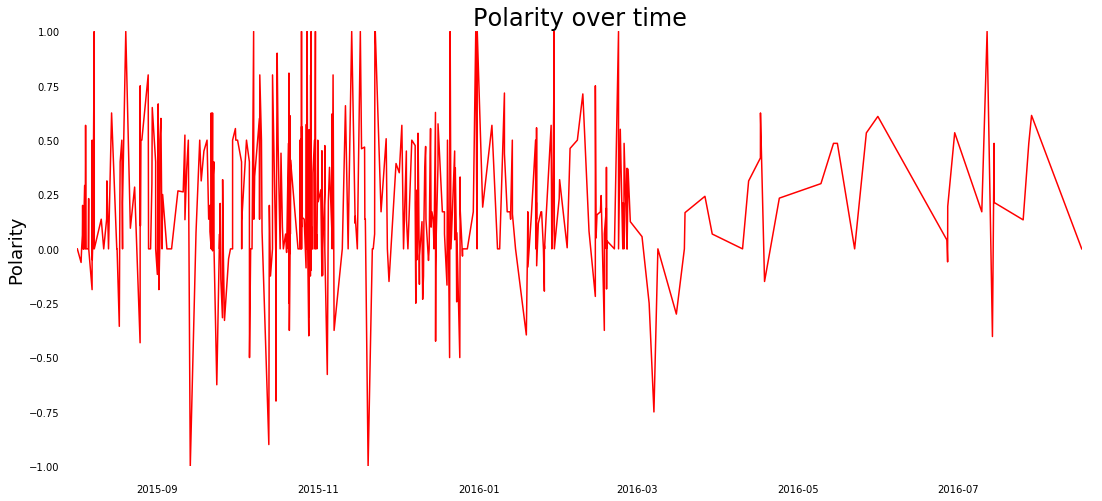

In [7]:
ts.plot_series(polarity, title='Polarity over time', ylabel='Polarity', color='red')

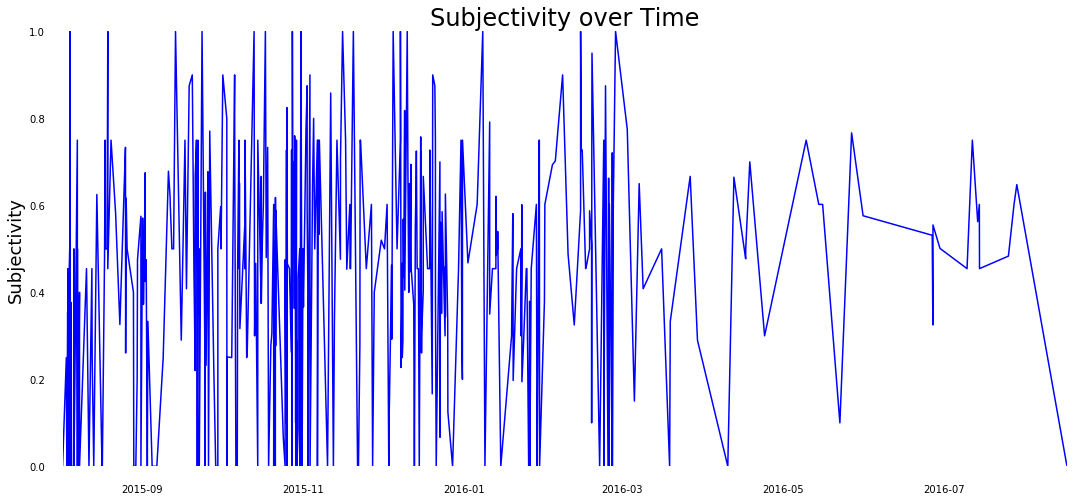

In [8]:
ts.plot_series(subjectivity, 'Subjectivity over Time', 'Subjectivity')

In [12]:
tweets.groupby(['created_at', 'polarity', 'subjectivity'])